# animate_lines - create NumPy array animations

> The module creates matplotlib animations from 2D and 3D NumPy arrays

In [ ]:
#| default_exp animate

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from matplotlib import animation
from IPython.display import HTML

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
def default_fig_setup():
    '''
    A boiler-plate wrapper to get a clean figure and axis from animations

    '''
    fig, ax = plt.subplots()
    return fig, ax
    

In [ ]:
#| export
def animate_lines(X, 
                     Y, 
                     xlabel = 'x-position', 
                     ylabel = 'y-position',
                     setup_fig_function = default_fig_setup,
                     xlims = [], ylims = [], 
                    labels = [],
                     linewidth = 5,
                     legend = False,
                     interval:int = 200,
                     **plotargs
                    ):
    '''
    `animate_lines(X, Y)` is a function that takes x2 3D arrays, `X` and `Y` 
    and returns an animation of the changing lines
    
    The `X` and `Y` arrays need to be arranged in 3D arrays such that, 
    
    `X[line_N, point_i, time_j], Y[line_N, point_i, time_j]`
    
    where each line is arranged in columns and the next frame is aranged in the 
    third dimension of the array
    
    If you are plotting a single line, you can use the columns as the timestep e.g. 
    
    `X[point_i, time_j], Y[point_i, time_j]`
    
     the function will add an extra axis to the beginning of the arrays as such
     
     `X[:, np.new_axis :], Y[:, np.new_axis, :]`
    
    Parameters:
    ----------
    `X`: The x-axis data for the animated lines, its shape is such that each column 
         is a set of x-values for a given line and each frame is organized along the 
         third dimension
    `Y`: The y-axis data for the animated lines, its shape is such that each column 
         is a set of y-values for a given line and each frame is organized along the 
         third dimension
    xlabel:  plot x-axis label, default is 'x-position', 
    ylabel: plot y-axis label, default is 'y-position', 
    setup_fig_function: a function that returns fig and ax that can be used to plot static lines 
                        before animating, default is an empty plot
    xlims: Manually set the x-axis limits. If its not specified, the animation uses 1.1*(max&min)
    ylims: [], 
    labels: [],
    linewidth: 5
    legend: False,
    `interval` : int, default: 200
                 Delay between frames in milliseconds.
    **plotargs: used as **kwargs for matplotlib's plot command
    
    
    Returns:
    --------
    `anim`: an `animation.FuncAnimation` result that can be viewed with Jupyter's HTML
          e.g. `HTML(anim.to_html5_video())` or `HTML(anim.to_jshtml())`
    '''
    if len(X.shape) < 3:
        X = X[:, np.newaxis, :]
    if len(Y.shape) < 3:
        Y = Y[:, np.newaxis,:]
    
    fig, ax = setup_fig_function()

    if len(xlims)<2: 
        ax.set_xlim((np.min(X)*1.1, np.max(X)*1.1));
    else: ax.set_xlim(xlims)
    if len(ylims)<2:
        ax.set_ylim((np.min(Y)*1.1, np.max(Y)*1.1));
    else: ax.set_ylim(ylims)
    
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

    i = 0
    lines = ax.plot(X[:, :, i], Y[:, :, i], lw=linewidth, **plotargs);
    if legend:
        plt.legend(lines, labels)

    def init():
        for j in range(len(lines)):
            lines[j].set_data([], [])
        return lines

    def animate(i):
        for j in range(len(lines)):
            lines[j].set_data(X[:, j, i], Y[:, j, i])
        return lines

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=range(0,Y.shape[-1]), 
                                   blit=True, interval = interval)
    plt.close(fig)
    HTML(anim.to_html5_video())
    return anim

Set up `X` and `Y` variables that are functions of time

each column is a single line, $x-$ or $y-$ values. Here, the first point in time is called with all columns and all rows. Each $(x_{zN},~y_{zN})$ is plotted as a single line for that animation frame. 
- lines that will be drawn are labeled $a,~b,~...~z$, for 4 lines, there are 4 columns. 
- $x-y$ coordinates are numbered $1,~2,~...~N$, for 100 coordinates, there are 100 rows. 

$X[:,~ :,~ 0] = \left[\begin{array}
~x_{a1}(0) & x_{b1}(0) & ... & x_{z1}(0)\\
x_{a2}(0) & x_{b2}(0) & ... & x_{z2}(0)\\
x_{a3}(0) & x_{b2}(0) & ... & x_{z3}(0)\\
... & ... & ... & ...\\
x_{aN}(0) & x_{bN}(0) & ... & x_{zN}(0)
\end{array}\right]$

$Y[:,~ :,~ 0] = \left[\begin{array}
~y_{a1}(0) & y_{b1}(0) & ... & y_{z1}(0)\\
y_{a2}(0) & y_{b2}(0) & ... & y_{z2}(0)\\
y_{a3}(0) & y_{b2}(0) & ... & y_{z3}(0)\\
... & ... & ... & ...\\
y_{aN}(0) & y_{bN}(0) & ... & y_{zN}(0)
\end{array}\right]$

The next time step would be, 

$X[:,~ :,~ 1] = \left[\begin{array}
~x_{a1}(\Delta t) & x_{b1}(\Delta t) & ... & x_{z1}(\Delta t)\\
x_{a2}(\Delta t) & x_{b2}(\Delta t) & ... & x_{z2}(\Delta t)\\
    x_{a3}(\Delta t) & x_{b2}(\Delta t) & ... & x_{z3}(\Delta t)\\
... & ... & ... & ...\\
x_{aN}(\Delta t) & x_{bN}(\Delta t) & ... & x_{zN}(\Delta t)
\end{array}\right]$

$Y[:,~ :,~ 1] = \left[\begin{array}
~y_{a1}(\Delta t) & y_{b1}(\Delta t) & ... & y_{z1}(\Delta t)\\
y_{a2}(\Delta t) & y_{b2}(\Delta t) & ... & y_{z2}(\Delta t)\\
y_{a3}(\Delta t) & y_{b2}(\Delta t) & ... & y_{z3}(\Delta t)\\
... & ... & ... & ...\\
y_{aN}(\Delta t) & y_{bN}(\Delta t) & ... & y_{zN}(\Delta t)
\end{array}\right]$

In this example, we create 4 vibration modes that vibrate while the amplitude decays, 

$y(t,~x) = A(t)\sin(\lambda x)$

where
- $t$ time goes from 0-5 seconds with 50 steps
- $x$ is the x-axis variable that goes from 0 to $2\pi$ units
- $A(t) = e^{-t/2}\cos(6t)$ is the oscillating and decaying amplitude
- $\lambda = \frac{1}{2},~1,~\frac{3}{2},~2$ are the wave shapes for 1/2-, full, 1.5 and 2x sine waves along the x-axis

In [ ]:
t = np.linspace(0, 5)
x = np.linspace(0, 2*np.pi, 100)

y1 = np.sin(x/2)
y2 = np.sin(x)
y3 = np.sin(1.5*x)
y4 = np.sin(2*x)

A = np.exp(-t/2)*np.cos(6*t)

y = np.array([y1, y2, y3, y4]).T

Now, I set up the full 3D arrays for `X` and `Y`. 

`X.shape` $=(100, 4, 50) = (rows,~columns,~layers)$
- axis 0: each row is a constant $x$-value 
- axis 1: each column is a new line that will be drawn
- axis 2: each layer is a new time step

In [ ]:
X = np.zeros((len(x), y.shape[1], len(t)))
Y = np.zeros((len(x), y.shape[1], len(t)))

for i in range(len(t)):
    Y[:, :, i] = A[i]*y
    X[:, :, i] = np.array([x for i in range(y.shape[1])]).T
    


Observing a static image, the 1/2-sine wave is shown every $5^{th}$ timestep.

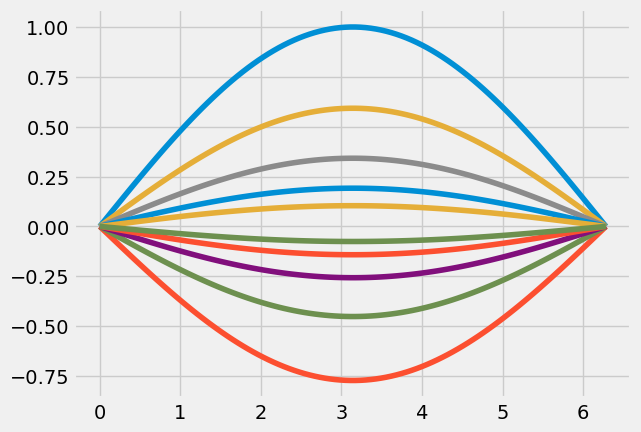

In [ ]:
for i in range(0, len(t), 5):
    plt.plot(X[:, 0, i], Y[:, 0, i])

Now, I can plot the $\times 4$ lines oscillating and watch the amplitudes decrease using the default parameters in 

In [ ]:
anim = animate_lines(X, Y, interval=84)

HTML(anim.to_html5_video())

I can also view the animation using Javascript HTML, which adds extra functionality to the video player, 

In [ ]:
HTML(anim.to_jshtml())